In [37]:
# from core import load_metrics, generate_population, tournament_selection, fixed_crossover, mutate, replace_weakest
from core.utils import load_metrics, generate_population, tournament_selection
from core.crossover import fixed_crossover, fixed_crossover_twopoint , ordered_crossover, partialMap_crossover
from core.mutation import mutate, multiple_mutate, inversion, scramble
from core.replacement import replace_firstweak, replace_weakest
import numpy as np
import matplotlib.pyplot as plt

In [12]:
sample = [
    [0,2,1,2,1],
    [2,0,2,2,2],
    [1,2,0,2,1],
    [2,2,2,0,2],
    [1,2,1,2,0]
]

### Chromosome Class

In [25]:
from core import fitness
from typing import List

class Chromosome:
    def __init__(self, genes:List[int]):
        self.genes = genes
        self.phenomes = self.__fitness__(genes=genes)

    def __fitness__(self, genes:List[int]) -> int:
        return fitness(genes, distance_metric=sample)

    def __str__(self):
        return f"Genes: {self.genes}\nPhenomes: {self.phenomes:.5f}"


### search function

In [26]:
def binary_tournament(population,fitness_value, tournament_size):
    parent1, _ = tournament_selection(population=population, fitness_value=fitness_value, tournament_size=tournament_size)
    parent2, _ = tournament_selection(population=population, fitness_value=fitness_value, tournament_size=tournament_size)
    return parent1 , parent2

In [30]:
def search(max_gens, pop_size, tour_size, co_fn, mut_fn):
    population = generate_population(distance_metric=sample, pop_size=pop_size)
    pop_fitness = [fitness(pop, distance_metric=sample) for pop in population]
    fit_avg = [np.mean(pop_fitness)]
    fit_upper = [np.max(pop_fitness)]
    fit_lower = [np.min(pop_fitness)]
    for i in range(max_gens):
        # parent1 = tournament_selection(population=population, fitness_value=pop_fitness, tournament_size=tour_size)
        parent1, parent2 = binary_tournament(population=population, fitness_value=pop_fitness, tournament_size=tour_size)
        child1 , child2 = co_fn(parent1=parent1, parent2=parent2)
        child1 , child2 = mut_fn(child1) , mut_fn(child2)
        population = replace_firstweak(population=population,candidate=child1,distance_metric=sample)
        population = replace_firstweak(population=population,candidate=child2,distance_metric=sample)
        pop_fitness = [fitness(pop, distance_metric=sample) for pop in population]
        fit_avg.append(np.mean(pop_fitness))
        fit_upper.append(np.max(pop_fitness))
        fit_lower.append(np.min(pop_fitness))
        if i > 2:
            if fit_avg[i] - fit_avg[i-1]:
                print(f"improve avg fitness from {fit_avg[i-1]} -> {fit_avg[i]}")

    return population, pop_fitness , fit_avg, fit_upper, fit_lower


### Experiments

Experiment01

In [31]:
max_gens = 100
pop_size = 10
tour_size = 4
mutate_fn = mutate
crossover_fn = fixed_crossover

pop1 , pop_fit1 , avg1 , upper1 , lower1 = search(
    max_gens=max_gens,
    pop_size=pop_size,tour_size=tour_size,mut_fn=mutate_fn,co_fn=crossover_fn)


In [32]:
pop1 , pop_fit1

([[3, 1, 2, 4, 0],
  [3, 1, 2, 4, 0],
  [3, 1, 2, 0, 4],
  [3, 1, 2, 4, 0],
  [3, 1, 2, 4, 0],
  [3, 1, 0, 4, 2],
  [4, 2, 3, 1, 0],
  [3, 1, 2, 4, 0],
  [3, 1, 2, 4, 0],
  [3, 1, 2, 4, 0]],
 [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [34]:
len(upper1)

101

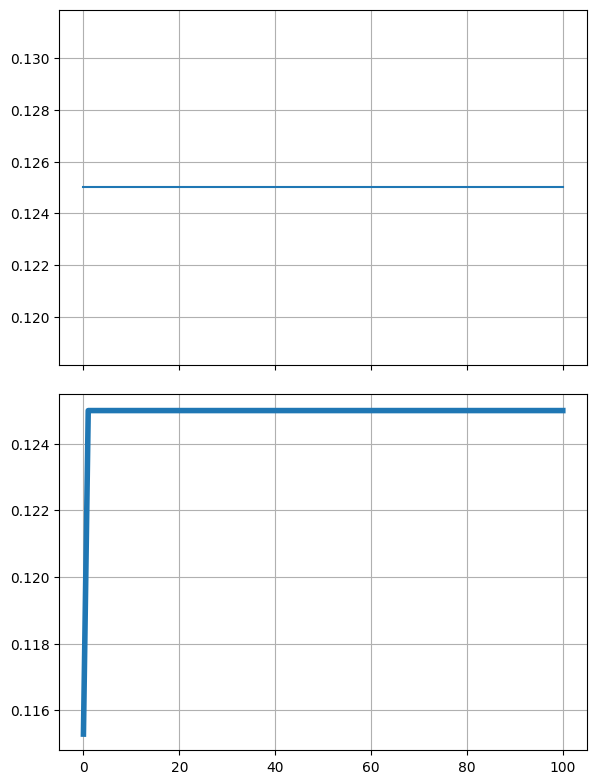

In [54]:
fig, ax = plt.subplots(2,1,figsize=(6,8), sharex=True)
x = list(range(len(upper1)))
fig.tight_layout()
ax[0].plot(x, upper1)
ax[1].plot(x, avg1,linewidth=4.0)
for a in ax:
    a.grid()

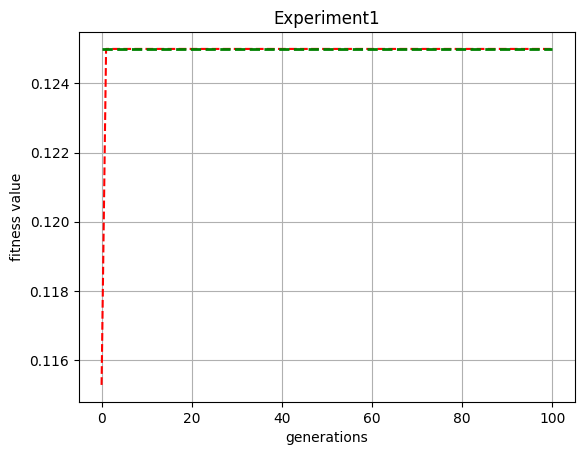

In [63]:
plt.plot(x, avg1, linestyle='--', color='red')
plt.plot(x, upper1, linestyle='--',color='g',linewidth=2.0)
plt.title("Experiment1")
plt.xlabel('generations')
plt.ylabel('fitness value')
plt.grid()
plt.show()